In [21]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import ast

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nicka\AppData\Roaming\nltk_data...


True

# This Notebook aims to do EDA on the News Dataset

In [2]:
news_data = pd.read_csv('data/MINDlarge_train/news.tsv', sep='\t', header=None)
news_data.columns = ['article_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']

In [9]:
news_data.head()

,article_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [3]:
news_data.describe()

,article_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
count,101527,101527,101527,101527,96112,101527,101524,101521
unique,101527,18,285,98388,91654,101526,66863,72168
top,N56840,sports,newsus,Powerball Winning Numbers For 10/26/2019 Drawi...,What's the weather today? What's the weather f...,[],[],[]
freq,1,32020,14467,27,435,2,26053,25480


In [4]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101527 entries, 0 to 101526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   article_id         101527 non-null  object
 1   category           101527 non-null  object
 2   subcategory        101527 non-null  object
 3   title              101527 non-null  object
 4   abstract           96112 non-null   object
 5   url                101527 non-null  object
 6   title_entities     101524 non-null  object
 7   abstract_entities  101521 non-null  object
dtypes: object(8)
memory usage: 6.2+ MB


### Missing Values

In [5]:
news_data.isna().sum()

article_id              0
category                0
subcategory             0
title                   0
abstract             5415
url                     0
title_entities          3
abstract_entities       6
dtype: int64

### Categories 

In [11]:
news_data["category"].describe()

count     101527
unique        18
top       sports
freq       32020
Name: category, dtype: object

In [12]:
news_data["category"].value_counts()

category
sports           32020
news             30478
finance           5916
travel            4955
lifestyle         4570
video             4569
foodanddrink      4418
weather           4255
autos             3071
health            2929
tv                1323
music             1263
entertainment      837
movies             815
kids               104
middleeast           2
games                1
northamerica         1
Name: count, dtype: int64

### Subcategories

In [13]:
news_data["subcategory"].describe()

count     101527
unique       285
top       newsus
freq       14467
Name: subcategory, dtype: object

In [7]:
news_data["subcategory"].value_counts()

subcategory
newsus               14467
football_nfl         11813
newspolitics          5145
weathertopstories     4253
newscrime             3676
                     ...  
autosmidsize             1
soccer_fifa_wwc          1
entertainmenttv          1
autoslosangeles          1
celebhub                 1
Name: count, Length: 285, dtype: int64

In [14]:
c=news_data[['category','subcategory']].value_counts()

index=[]
for i in c.index:
    index.append(np.array(i))
index=np.array(index)

distribution_df=pd.DataFrame(columns=['category','subcategory','values'])
distribution_df['category']=index[:,0]
distribution_df['subcategory']=index[:,1]
distribution_df['values']=c.values

px.bar(data_frame=distribution_df,x='category',y='values',color='subcategory')

## Titles and Abstract

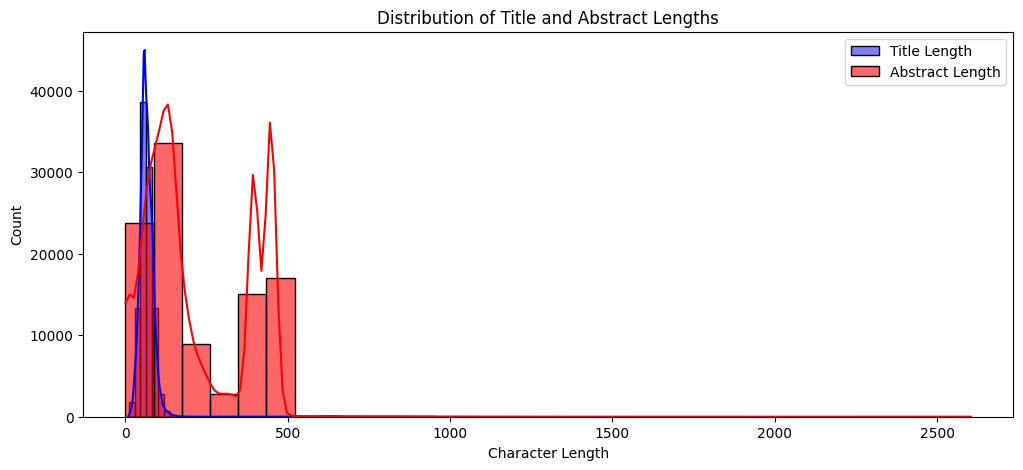

In [22]:
news_data["title_length"] = news_data["title"].astype(str).apply(len)
news_data["abstract_length"] = news_data["abstract"].astype(str).apply(len)

plt.figure(figsize=(12, 5))
sns.histplot(news_data["title_length"], bins=30, kde=True, color="blue", label="Title Length")
sns.histplot(news_data["abstract_length"], bins=30, kde=True, color="red", label="Abstract Length", alpha=0.6)
plt.xlabel("Character Length")
plt.ylabel("Count")
plt.title("Distribution of Title and Abstract Lengths")
plt.legend()
plt.show()

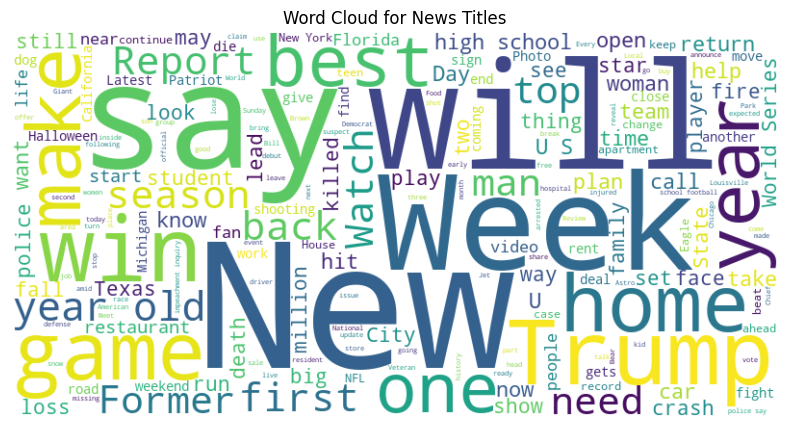

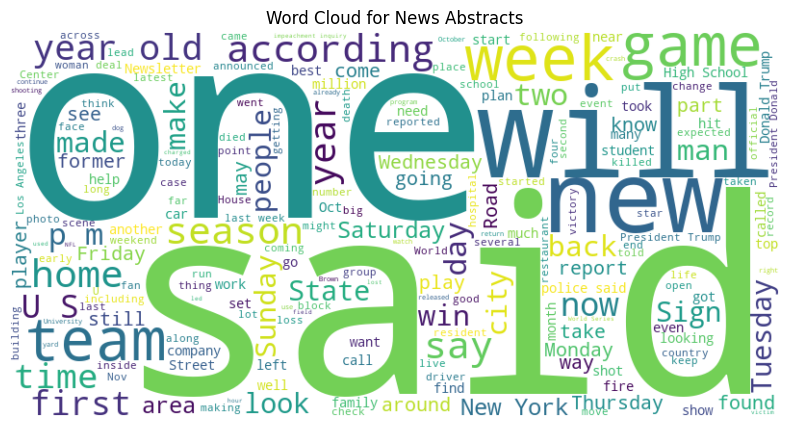

In [23]:
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Concatenate all titles and abstracts
title_text = " ".join(news_data["title"].dropna())
abstract_text = " ".join(news_data["abstract"].dropna())

# Generate word clouds
generate_wordcloud(title_text, "Word Cloud for News Titles")
generate_wordcloud(abstract_text, "Word Cloud for News Abstracts")

C:\Users\nicka\AppData\Local\Temp\ipykernel_12864\1811329197.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




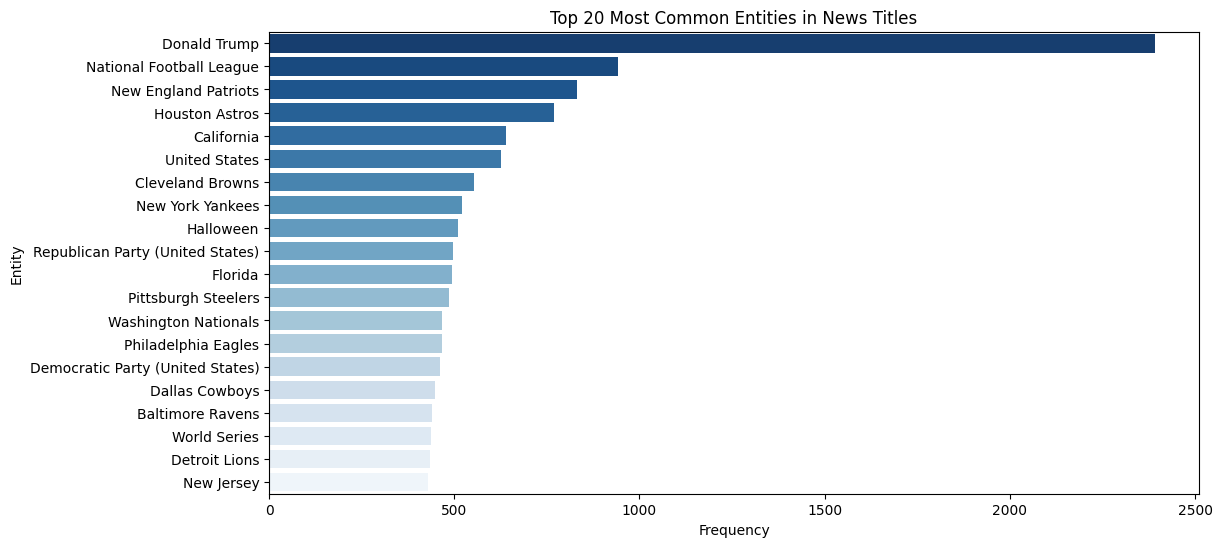

C:\Users\nicka\AppData\Local\Temp\ipykernel_12864\1811329197.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




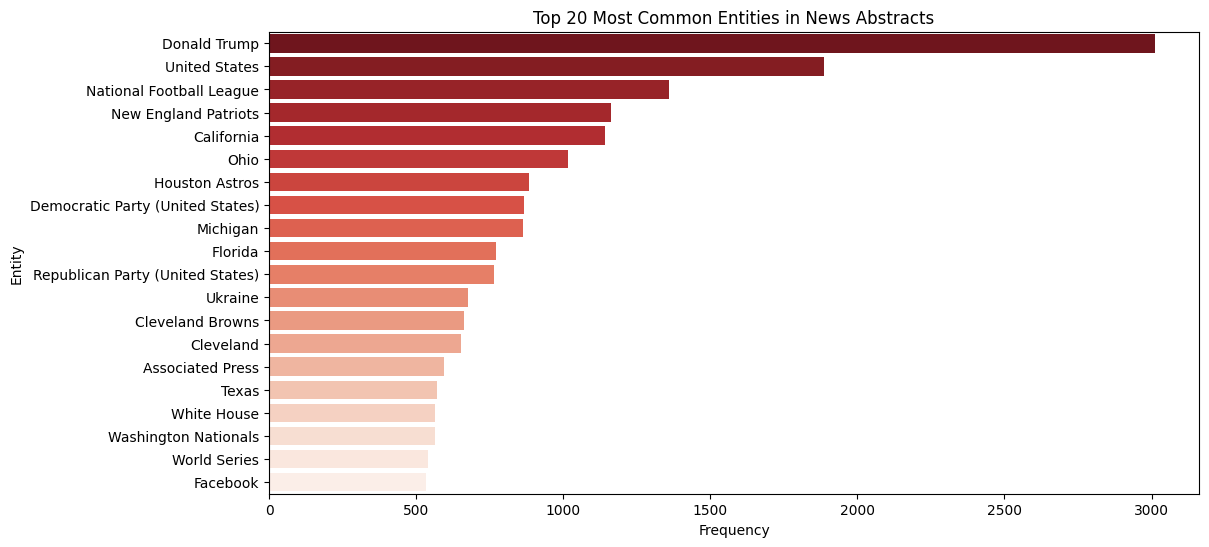

In [24]:
def extract_entities(column):
    entities_list = []
    for row in column.dropna():
        try:
            entities = ast.literal_eval(row)  # Convert string to list of dicts
            entities_list.extend([ent["Label"] for ent in entities])
        except (ValueError, SyntaxError):
            continue  # Skip malformed data
    return entities_list

# Extract entities
title_entities = extract_entities(news_data["title_entities"])
abstract_entities = extract_entities(news_data["abstract_entities"])

# Count entity frequency
title_entity_counts = Counter(title_entities).most_common(20)
abstract_entity_counts = Counter(abstract_entities).most_common(20)

# Convert to DataFrame for visualization
title_entity_df = pd.DataFrame(title_entity_counts, columns=["Entity", "Count"])
abstract_entity_df = pd.DataFrame(abstract_entity_counts, columns=["Entity", "Count"])

# Plot most common entities in titles
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Entity", data=title_entity_df, palette="Blues_r")
plt.xlabel("Frequency")
plt.ylabel("Entity")
plt.title("Top 20 Most Common Entities in News Titles")
plt.show()

# Plot most common entities in abstracts
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Entity", data=abstract_entity_df, palette="Reds_r")
plt.xlabel("Frequency")
plt.ylabel("Entity")
plt.title("Top 20 Most Common Entities in News Abstracts")
plt.show()


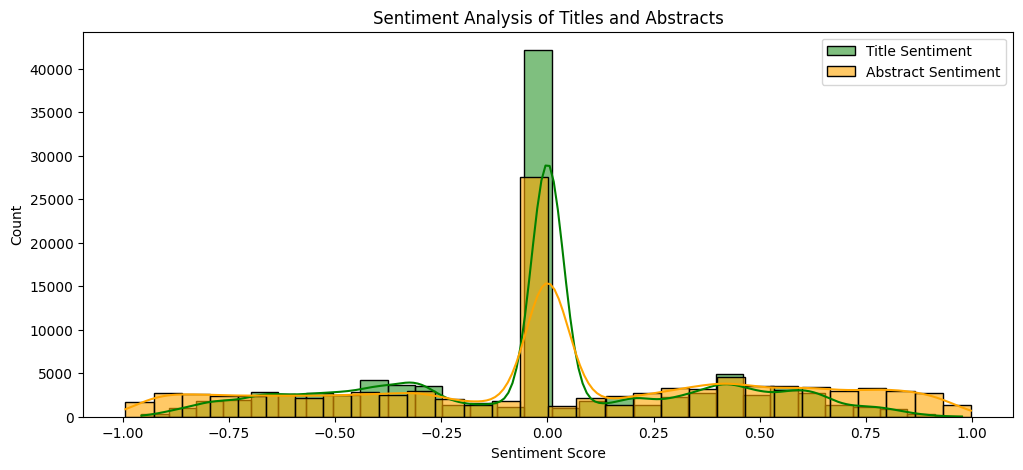

In [25]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return sia.polarity_scores(text)["compound"]

news_data["title_sentiment"] = news_data["title"].astype(str).apply(analyze_sentiment)
news_data["abstract_sentiment"] = news_data["abstract"].astype(str).apply(analyze_sentiment)

# Plot sentiment distribution
plt.figure(figsize=(12, 5))
sns.histplot(news_data["title_sentiment"], bins=30, kde=True, color="green", label="Title Sentiment")
sns.histplot(news_data["abstract_sentiment"], bins=30, kde=True, color="orange", label="Abstract Sentiment", alpha=0.6)
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.title("Sentiment Analysis of Titles and Abstracts")
plt.legend()
plt.show()